In [129]:
%env DATA_ROOT /atmacup/atmacup11/data

env: DATA_ROOT=/atmacup/atmacup11/data


In [32]:
pwd

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup'

In [38]:
cd ${DATA_ROOT}

[WinError 2] 指定されたファイルが見つかりません。: '${DATA_ROOT}'
C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data


In [39]:
pwd

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data'

In [50]:
pwd


'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data\\inputs'

In [51]:
import os

import pandas as pd
import numpy as np
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
!pip install python-vivid

  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2461 sha256=196701c62df1c0ec2eddf53b82a030bbbfed03b0a1893e7088f67f9bae1772fd
  Stored in directory: c:\users\zaxir\appdata\local\pip\cache\wheels\7b\83\4b\44aa8f2292c0ae17a550c5105454e974fc45a5b2a522d66ae1
Successfully built feather-format


In [174]:
dataset_root = os.path.join(os.path.expanduser("~"),"Documents\\my_pj\\learn\\atmacup\\atmacup11\\data")

In [175]:
print(dataset_root)

C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data


In [179]:
input_dir = os.path.join(dataset_root,"inputs")
photo_dir = os.path.join(input_dir,"photos\\photos")
output_dir = os.path.join(dataset_root,"outputs_tutorial#1")
print(input_dir)
print(photo_dir)

C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data\inputs
C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data\inputs\photos\photos


In [166]:
os.makedirs(output_dir,exist_ok=True)

In [167]:
photo_pathes = glob(os.path.join(photo_dir,"*.jpg"))

In [168]:
glob(dataset_root + '/inputs/*')

['C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\atmaCup#11_sample_submission.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\materials.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\photos',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\techniques.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\test.csv',
 'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\atmacup\\atmacup11\\data/inputs\\train.csv']

In [74]:
dataset_root

'/atmacup/atmacup11/data'

In [75]:
input_dir

'/atmacup/atmacup11/data\\inputs'

In [98]:
cd ./data

C:\Users\zaxir\Documents\my_pj\learn\atmacup\atmacup11\data


In [102]:
train_df = pd.read_csv('./inputs/train.csv')
test_df = pd.read_csv('./inputs/test.csv')

material_df = pd.read_csv('./inputs/materials.csv')
technique_df = pd.read_csv('./inputs/techniques.csv')

In [103]:
from matplotlib_venn import venn2

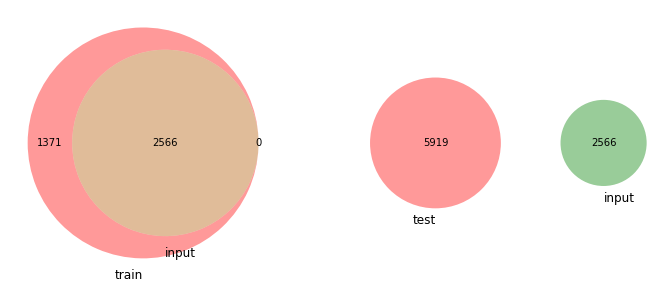

In [105]:
input_df = technique_df

fig,axes = plt.subplots(figsize=(12,5),ncols=2)

venn2(subsets=(
    set(train_df['object_id']),set(input_df['object_id'])
),set_labels=('train','input'),ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']),set(input_df['object_id'])
),set_labels=('test','input'),ax=axes[1])


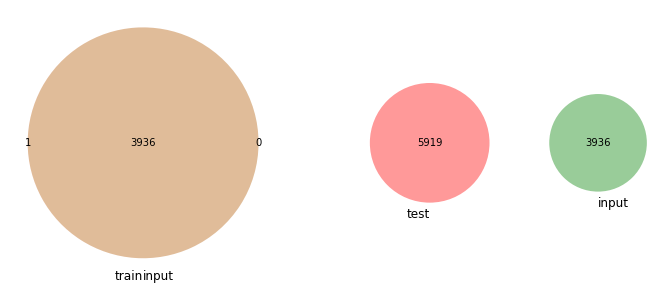

In [106]:
# materialの場合
input_df = material_df

fig,axes = plt.subplots(figsize=(12,5),ncols=2)

venn2(subsets=(
    set(train_df['object_id']),set(input_df['object_id'])
),set_labels=('train','input'),ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']),set(input_df['object_id'])
),set_labels=('test','input'),ax=axes[1])

In [107]:
train_df.head()

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3


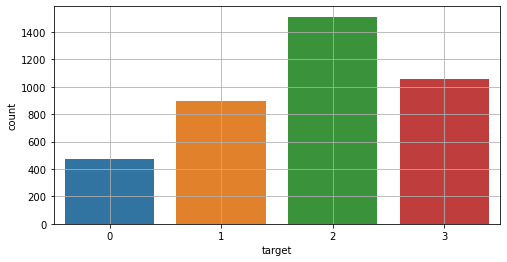

In [108]:
fig,ax=plt.subplots(figsize=(8,4))
sns.countplot(data=train_df,x='target',ax=ax)
ax.grid()

In [109]:
train_df['target'].value_counts().sort_index()

0     475
1     896
2    1511
3    1055
Name: target, dtype: int64

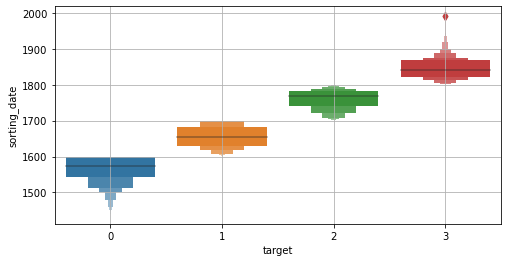

In [110]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxenplot(data=train_df,x='target',y='sorting_date',ax=ax)
ax.grid()

In [112]:
train_df.groupby('target')['sorting_date'].agg(['min','max','median','size'])

,min,max,median,size
target,,,,
0,1440,1600,1574,475
1,1601,1700,1655,896
2,1701,1800,1770,1511
3,1801,1991,1841,1055


In [113]:
test_df.head()

,object_id
0,0009e50b94be36ccad39
1,000bd5e82eb22f199f44
2,0015f44de1854f617516
3,00388a678879ba1efa27
4,005e1e7c6496902d23f3


In [116]:
from PIL import Image

def to_img_path(object_id):
    return os.path.join(photo_dir,f'{object_id}.jpg')

def read_image(object_id):
    return Image.open(to_img_path(object_id))

In [180]:
img = read_image(train_df['object_id'].iat[0])

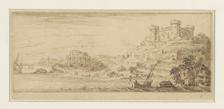

In [181]:
img